In [419]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [290]:
"""
    数据读取
"""

data_power = {
    '0':0,
    '1':2,
    '.':1,
    '#':5
}

def read_data(filename):    
    with open('data/'+filename) as f:
        lines = f.readlines()
        lines = map(lambda x:x.strip() , lines)
        lines = list(lines)
        data = map(lambda x:x.split() ,lines)
        data = list(data)
        data = np.array(data,dtype=list)
        
        return data[:,1].reshape(data.shape[0],1)
        

In [501]:
def plot_data(X,Y):
    plt.scatter(X,Y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

def plot_3d(X,Y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    n = 100

    ax.scatter(X['X1'], X['X2'], Y, c=c, marker=m)
   # ax.view_init(elev=0 ,azim=90)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')

    plt.show()
    
    
def compute_power(num,pos):
    
    return data_power[num]*np.power(3,pos)

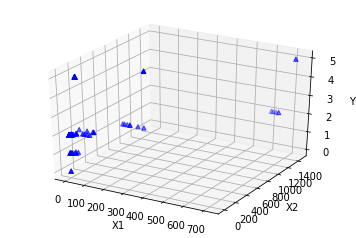

In [502]:
# X,Y = test('1',2)
# plot_data(X['X2'],Y)
# plot_data(X['X1'],Y)
plot_3d(X,Y)

In [457]:
def data_reprocess(datas):
    X = []
    Y = []
    for data in datas:
        for pos,x in enumerate(data[0][:-1]):
            value = compute_power(x,pos)
            X.append(value)
            if pos != 0:
                X[len(X)-1] += X[len(X)-2]
            Y.append( data_power[data[0][pos+1]] )
    X = np.array(X)
    Y = np.array(Y)
    return X.reshape(X.shape[0],1),Y.reshape(Y.shape[0],1)

def data_reprocess2(datas):
    X1 = []
    X2 = []
    Y = []
    for data in datas:
        for pos,x in enumerate(data[0][:-1]):
            value = compute_power(x,pos)
            X2.append( value )
            if pos != 0:
                temp = X1[len(X1)-1] + X2[len(X2)-2]
#                 print( '{}+{}={}'.format(X1[len(X1)-1],X2[len(X2)-2] ,X1[len(X1)-1] + X2[len(X2)-2] ) )
#                 print(temp)
                X1.append(temp)
                
            else:
                X1.append(np.int32(0))
            Y.append( data_power[data[0][pos+1]] )
    X1 = np.array(X1)
    X2 = np.array(X2)
    Y = np.array(Y)
    return X1.reshape(X1.shape[0],1),X2.reshape(X2.shape[0],1),Y.reshape(Y.shape[0],1)

In [373]:
def regularization(X):
    X_mean = np.mean(X)
    X_std = np.std(X)
    X_reg = (X-X_mean)/X_std
    
    return X_reg

In [374]:
def test(filename,debug = 1):   
    datas = read_data(filename)
    
    if debug == 1:
        X,Y = data_reprocess(datas)
        return X,Y
    elif debug == 2:
        X1,X2,Y = data_reprocess2(datas)
        X = {
            'X1':X1,
            'X2':X2
        }
        return X,Y


In [460]:
print(X['X1'])

[[  0]
 [  0]
 [  3]
 [ 21]
 [ 75]
 [237]
 [  0]
 [  0]
 [  3]
 [ 21]
 [ 75]
 [237]
 [  0]
 [  2]
 [  8]
 [ 26]
 [  0]
 [  2]
 [  8]
 [ 17]
 [ 44]
 [125]
 [611]
 [  0]
 [  2]
 [  5]
 [ 14]
 [ 41]
 [203]
 [  0]
 [  2]
 [  8]
 [ 26]
 [  0]
 [  2]
 [  8]
 [ 26]
 [  0]
 [  2]
 [  8]
 [ 26]
 [  0]
 [  2]
 [  8]
 [ 26]
 [  0]
 [  2]
 [  8]
 [ 26]
 [ 53]
 [134]
 [620]
 [  0]
 [  2]
 [  8]
 [ 26]
 [  0]
 [  2]
 [  8]
 [ 26]
 [  0]
 [  2]
 [  8]
 [ 26]
 [  0]
 [  2]
 [  8]
 [ 26]
 [ 80]
 [161]
 [647]
 [  0]
 [  2]
 [  8]
 [ 26]
 [  0]
 [  2]
 [  8]
 [ 26]
 [  0]
 [  2]
 [  8]
 [ 26]
 [  0]
 [  1]
 [  4]
 [ 13]
 [ 67]
 [148]
 [634]
 [  0]
 [  2]
 [  8]
 [ 26]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [162]
 [648]
 [  0]
 [  2]
 [  8]
 [ 17]
 [ 71]
 [233]
 [719]
 [  0]
 [  2]
 [  8]
 [ 26]]


In [463]:
print(Y)

[[1]
 [2]
 [2]
 [2]
 [2]
 [5]
 [1]
 [2]
 [2]
 [2]
 [2]
 [5]
 [2]
 [2]
 [2]
 [5]
 [2]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [5]
 [2]
 [2]
 [2]
 [5]
 [2]
 [2]
 [2]
 [5]
 [2]
 [2]
 [2]
 [5]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [5]
 [2]
 [2]
 [2]
 [5]
 [2]
 [2]
 [2]
 [5]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [5]
 [2]
 [2]
 [2]
 [5]
 [2]
 [2]
 [2]
 [5]
 [1]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [5]
 [0]
 [0]
 [0]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [5]
 [2]
 [2]
 [2]
 [5]]
